In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

In [ ]:
# Define the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for digits 0-9
])
model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1460 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1088 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0925 - accuracy: 0.9711
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9760


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 - 0s - loss: 0.0704 - accuracy: 0.9776 - 380ms/epoch - 1ms/step
Test accuracy: 97.76%


1/1 [==============================] - 0s 38ms/step


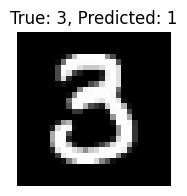

1/1 [==============================] - 0s 23ms/step


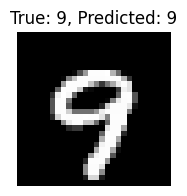

1/1 [==============================] - 0s 22ms/step


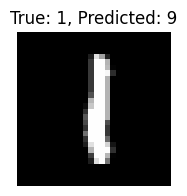

1/1 [==============================] - 0s 28ms/step


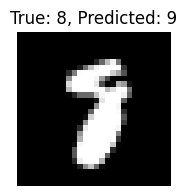

1/1 [==============================] - 0s 25ms/step


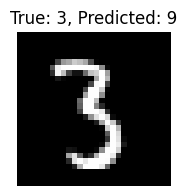

In [ ]:
# Visualize some test images and their predictions
num_samples_to_visualize = 5

for i in range(num_samples_to_visualize):
    index = np.random.randint(0, len(x_test))
    test_image = x_test[index]
    true_label = y_test[index]

    # Make a prediction
    predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

    # Plot the image and display the true and predicted labels
    plt.figure(figsize=(2, 2))
    plt.imshow(test_image, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()